In [1]:
# Conv2D(커널(필터, 도장)의 갯수, kernel_size(정방 행렬), activation)
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size = (3,3), activation='relu')
# 주로 (3, 3), (5, 5) 사용

## 합성곱 연산 내에서 처리되는 트릭들: 패딩과 스트라이드

### 패딩

입력 배열의 주위를 가상 원소(0)로 채워서 특성 맵의 크기를 입력의 크가와 같게 만들어주는 기법

이유: 가생이 부분의 입력값을 합성곱에 많이 참여시키게 하기 위하여

- valid: 순수 입력값
- same: 입력값의 크기 == 특성맵의 크기

### 스트라이드

필터의 이동 범위, 도장이 몇칸을 건너뛰는지

In [2]:
keras.layers.Conv2D(10, kernel_size = (3,3), activation='relu', padding = 'same')

## 합성곱 연산이후 처리되는 액션: 풀링

합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할

하지만 특성 맵의 갯수는 줄이지 않는다

(2, 2, 3) -> (1, 1, 3)

풀링에는 가중치가 없다, 도장찍은 영역에서 가장 큰 값(최대 풀링(max pooling)) 혹은 평균값 (average pooling)이라 부른다.

그리고 풀링은 영역 간 겹치지 않게 이동한다. 출력값은 특성맵이라 부른다.

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

In [5]:
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(
    keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same')
)
model.add(keras.layers.MaxPooling2D(2))

In [7]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

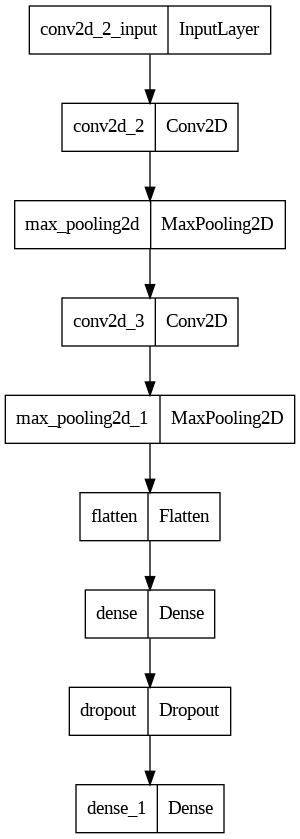

In [9]:
keras.utils.plot_model(model)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 90s 59ms/step - loss: 0.5240 - accuracy: 0.8087 - val_loss: 0.3364 - val_accuracy: 0.8740
Epoch 2/20
1500/1500 [==============================] - 96s 64ms/step - loss: 0.3480 - accuracy: 0.8741 - val_loss: 0.2935 - val_accuracy: 0.8904
Epoch 3/20
1500/1500 [==============================] - 87s 58ms/step - loss: 0.2974 - accuracy: 0.8932 - val_loss: 0.2600 - val_accuracy: 0.9009
Epoch 4/20
1500/1500 [==============================] - 89s 59ms/step - loss: 0.2641 - accuracy: 0.9035 - val_loss: 0.2439 - val_accuracy: 0.9107
Epoch 5/20
1500/1500 [==============================] - 85s 56ms/step - loss: 0.2371 - accuracy: 0.9126 - val_loss: 0.2305 - val_accuracy: 0.9116
Epoch 6/20
1500/1500 [==============================] - 89s 59ms/step - loss: 0.2178 - accuracy: 0.9207 - val_loss: 0.2225 - val_accuracy: 0.9178
Epoch 7/20
1500/1500 [==============================] - 85s 57ms/step - loss: 0.1979 - accuracy: 0.9266 - val_loss: 0.2136 -

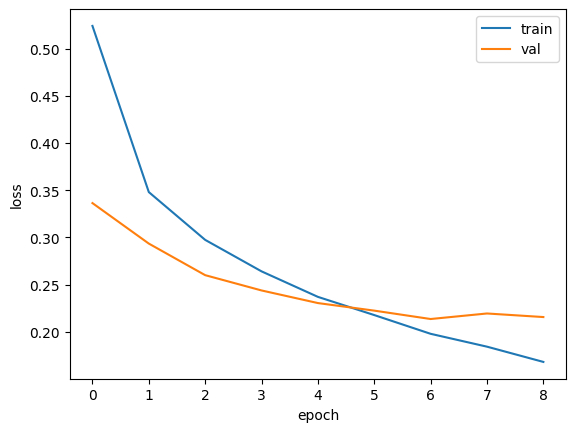

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [12]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 10s 27ms/step - loss: 0.2136 - accuracy: 0.9219


[0.2136051207780838, 0.921916663646698]

In [13]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [14]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 8s 23ms/step - loss: 0.2401 - accuracy: 0.9147


[0.24011516571044922, 0.9146999716758728]